# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

*En primer lugar se deben cargar los archivos csv y visualizar la información de cada tabla, para familiarizarce con el tema y entender con que datos vamos a trabajar más adelante, que cambios tendremos que posiblemente realizar y como podremos abordar el anális.*

In [1]:
# importar librerías
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
# leer conjuntos de datos en los DataFrames
products = pd.read_csv('products.csv')

In [3]:
# mostrar información del DataFrame
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [14]:
# mostrar información del DataFrame
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 1 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   product_id;product_name;aisle_id;department_id  49694 non-null  object
dtypes: object(1)
memory usage: 388.4+ KB


In [13]:
# mostrar información del DataFrame
aisles.info()

NameError: name 'aisles' is not defined

In [ ]:
# mostrar información del DataFrame
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [ ]:
# mostrar información del DataFrame
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con la carga de la información
    

## Conclusiones

*Podemos ver que tenemos 5 tablas que guardan datos relevantes acerca de los pedidos, hay mas de 4 millones y medio de entradas correspondientes a ordenes, 21 entradas para los departamentos y 134 para las islas, esto en cuanto a organización logística del almacen; existe más de 49.600 entradas para productos y mas de 478.000 pedidos  realizados a través de la app de Instacart*

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

*En éste paso es importante verificar que los tipos de datos sean los mas convenientes para el procesamiento y si es necesario realizar las correciones pertinentes, también se deben identificar y completar los valores ausentes y de igual manera hacer las correcciones para los valores duplicados.*

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [ ]:
# Revisa si hay pedidos duplicados
print('Total de pedidos duplicados:', orders.duplicated().sum())
print()
print(orders[orders.duplicated()])

Total de pedidos duplicados: 15

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742  

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?<br>
*Existen 15 lineas duplicadas y tienen en común que se relizaron el día miercoles a las 2am.*

In [ ]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
order_duplicated = orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]
print(order_duplicated)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?<br>
*Con éste resultado se entiende que de 121 ordenes realizadas el día miercoles a las 2am, 15 están duplicadas.*

In [ ]:
# Elimina los pedidos duplicados
orders.drop_duplicates(inplace=True)
orders.reset_index(drop=True, inplace=True)

In [ ]:
# Vuelve a verificar si hay filas duplicadas
print('Filas duplicadas:', orders.duplicated().sum())

Filas duplicadas: 0


In [ ]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print('IDs duplicados de pedidos:', orders['order_id'].duplicated().sum())

IDs duplicados de pedidos: 0


*Se encontraron 15 lineas duplicadas en orders y luego de revisarlas, se eliminaron y despues se volvio a revisar que no existieran ni lineas, ni ID's duplicados.*

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el análisis de duplicados

### `products` data frame

In [ ]:
# Verifica si hay filas totalmente duplicadas
print('Número de filas totalmente duplicadas:', products.duplicated().sum())

Número de filas totalmente duplicadas: 0


In [ ]:
# Revisa únicamente si hay ID de productos duplicados
print('Id de productos duplicados:', products['product_id'].duplicated().sum())

Id de productos duplicados: 0


In [ ]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['product_name'] = products['product_name'].str.upper()
print(products.head())
print()
print('Nombres de productos duplicados:', products['product_name'].duplicated().sum())

   product_id                                       product_name  aisle_id  \
0           1                         CHOCOLATE SANDWICH COOKIES        61   
1           2                                   ALL-SEASONS SALT       104   
2           3               ROBUST GOLDEN UNSWEETENED OOLONG TEA        94   
3           4  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...        38   
4           5                          GREEN CHILE ANYTIME SAUCE         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  

Nombres de productos duplicados: 1361


In [ ]:
# Revisa si hay nombres duplicados de productos no faltantes
products_clean = products.dropna(subset=["product_name"])
duplicated_products = products_clean[products_clean.duplicated(subset=["product_name"])]

print(duplicated_products)

       product_id                                     product_name  aisle_id  \
2058         2059                                  BIOTIN 1000 MCG        47   
5455         5456                 GREEN TEA WITH GINSENG AND HONEY        96   
5558         5559                           CREAM OF MUSHROOM SOUP        69   
7558         7559                        CINNAMON ROLLS WITH ICING       105   
9037         9038                           AMERICAN CHEESE SLICES        21   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
2058            

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo identificando los registros duplicados con nombres no faltantes

*El df "products" no tiene filas totalmente duplicadas, tampoco tiene ID's duplicados, sin embargo existen 1361 nombres de productos duplicados, pero al revisar los nombres de productos no faltantes encontramos que 104 de los nombres pertenecen a nombres de productos no faltantes, por lo tanto los demás 1257 nombres duplicados son de caracter indefinido (NaN).*

### `departments` data frame

In [ ]:
# Revisa si hay filas totalmente duplicadas
print('Filas totalmente duplicadas:', departments.duplicated().sum())

Filas totalmente duplicadas: 0


In [ ]:
# Revisa únicamente si hay IDs duplicadas de departamentos
print('IDs duplicadas de departamentos:', departments['department_id'].duplicated().sum())

IDs duplicadas de departamentos: 0


*Los datos para los departamentos de viveres no se encuentran duplicados.*

### `aisles` data frame

In [ ]:
# Revisa si hay filas totalmente duplicadas
print('Filas totalmente duplicadas:', aisles.duplicated().sum())

Filas totalmente duplicadas: 0


In [ ]:
# Revisa únicamente si hay IDs duplicadas de pasillos
print('IDs duplicadas de pasillos:', aisles['aisle_id'].duplicated().sum())

IDs duplicadas de pasillos: 0


*Los datos para los pasillos de viveres no se encuentran duplicados.*

### `order_products` data frame

In [ ]:
# Revisa si hay filas totalmente duplicadas
print('Filas totalmente duplicadas:', order_products.duplicated().sum())

Filas totalmente duplicadas: 0


In [ ]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print('ID de productos repetidos:', order_products['product_id'].duplicated().sum())
print('ID de pedidos repetidos:', order_products['order_id'].duplicated().sum())

ID de productos repetidos: 4499434
ID de pedidos repetidos: 4094961


*"Order_products" no tiene filas totalmente duplicadas, sin embargo podemos ver la existencia de una gran cantidad de datos duplicados respecto a las columnas product_id ( 4.499.434) y order_id (4.094.961), esto se puede explicar porque un mismo producto y un mismo pedido pueden aparecer en distintos "carritos de compra".*

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [ ]:
# Encuentra los valores ausentes en la columna 'product_name'
print('Valores ausentes en la columna nombre de producto:', products['product_name'].isna().sum())

Valores ausentes en la columna nombre de producto: 1258


Describe brevemente cuáles son tus hallazgos.<br>
*Existen 1.258 valores ausentes de nombres de producto.*

In [ ]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(products[products['aisle_id'] == 100])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


In [ ]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(products[products['department_id'] == 21])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


In [ ]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(products[(products['aisle_id'] == 100) & (products['department_id']==21)])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.<br>
*Los 1.258 datos ausentes están relacionados con el departamento con ID 21 y el pasillo con ID 100; habría que profundizar acerca de esta ubicación de los viveres para entender este comportamiento, podria ser que alli se guardan articulos varios.*

In [ ]:
# Completa los nombres de productos ausentes con 'Unknown'
products = products.fillna('Unknown')
print('Valores ausentes en la columna nombre de producto:', products['product_name'].isna().sum())
print(products[(products['aisle_id'] == 100) & (products['department_id']==21)])

Valores ausentes en la columna nombre de producto: 0
       product_id product_name  aisle_id  department_id
37             38      Unknown       100             21
71             72      Unknown       100             21
109           110      Unknown       100             21
296           297      Unknown       100             21
416           417      Unknown       100             21
...           ...          ...       ...            ...
49552       49553      Unknown       100             21
49574       49575      Unknown       100             21
49640       49641      Unknown       100             21
49663       49664      Unknown       100             21
49668       49669      Unknown       100             21

[1258 rows x 4 columns]


Describe brevemente tus hallazgos y lo que hiciste con ellos.<br>
*Luego de revisar los nombres indefinidos decidimos completarlos con la palabra "desconocido", debido a que su cantidad no es demasiada y para mejorar el entendimiento y tratamiento de los datos.*


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! Desarrollaste de manera excelente el análisis de valores faltantes y los llenaste con "unknown".
    

### `orders` data frame

In [ ]:
# Encuentra los valores ausentes
print(orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [ ]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
null_order = orders[orders.isnull().any(axis=1)]
non_first_null = null_order[null_order['order_number'] > 1]
print(non_first_null)

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.<br>
*En la columna "days_since_prior_order" del df "orders" encontramos 28.817 valores indefinidos, esto se puede explicar porque al ser el primer pedido realizado, el número de días desde su primer orden va a ser cero o en este caso es indefinido.*

### `order_products` data frame

In [ ]:
# Encuentra los valores ausentes
print(order_products.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [ ]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
val_max = order_products['add_to_cart_order'].max()
val_min = order_products['add_to_cart_order'].min()
print('El valor máximo de la columna -add_to_cart_order- es:', val_max)
print('El valor mínimo de la columna -add_to_cart_order- es:', val_min)

El valor máximo de la columna -add_to_cart_order- es: 64.0
El valor mínimo de la columna -add_to_cart_order- es: 1.0


Describe brevemente cuáles son tus hallazgos.<br>
*Para este df, existen 836 datos nulos en la columna que almacena el orden secuencial en el que se añadió cada artículo en el carrito. También encontramos que el valor máximo de esta columna es 64 articulos añadidos y el mínimo es 1 artículo.*

In [ ]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
missing_values = order_products[order_products['add_to_cart_order'].isna()]['order_id']
print(missing_values)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [ ]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
null = orders[orders.isnull().any(axis=1)]

merged = null.merge(order_products, on='order_id', how='left')
product_counts = merged.groupby('order_id')['product_id'].count()

total = (product_counts > 64).all()

print(f'Todos los pedidos con datos ausentes tienen más de 64 productos? {total}')

Todos los pedidos con datos ausentes tienen más de 64 productos? False


Describe brevemente cuáles son tus hallazgos.<br>
*Encontramos que todos los pedidos con datos ausentes no tienen más de 64 productos añadidos y esto es lógico porque el maximo de esta columna es precisamente 64 artículos.*

In [ ]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products = order_products.fillna(999)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)
print(order_products.dtypes)

order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object


Describe brevemente tus hallazgos y lo que hiciste con ellos.<br>
*Llenamos los valores ausentes en order_products con el número 999 para mantener los datos con fines de un tratamiento posterior diferenciando estos productos en algo así como una categoria especial de "sin orden de adición", pero tambien los pudimos haber completado con valores tomados de la media o mediana.*

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo con este ejercicio, completaste de manera perfecta los valores ausentes con 999.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos<br>
*El procesamiento para las tablas de datos que estamos trabajando se realizó con fines de lograr manejar los datos y realizar los análisis pertinentes que se solicitan más adelante de la manera más adecuada, es interesante entender como podemos abordar los datos faltantes y los datos duplicados para que cualquier cambio tenga la menor incidencia negativa o cambie drásticamente nuestros análisis y debemos ser muy conscientes de ello, pues a partir de esto se espera tomar decisiones trascendetales.*


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [ ]:
order_hour = orders[(orders['order_hour_of_day'] < 0) | (orders['order_hour_of_day'] > 23)]

if order_hour.empty:
    print("Todos los valores en la columna 'order_hour_of_day' oscilan entre 0 y 23.")
else:
    print(f"Valores fuera de rango en 'order_hour_of_day':\n{order_hour}")

Todos los valores en la columna 'order_hour_of_day' oscilan entre 0 y 23.


In [ ]:
order_day = orders[(orders['order_dow'] < 0) | (orders['order_dow'] > 6)]

if order_day.empty:
    print("Todos los valores en la columna 'order_dow' oscilan entre 0 y 6.")
else:
    print(f"Valores fuera de rango en 'order_dow':\n{order_day}")

Todos los valores en la columna 'order_dow' oscilan entre 0 y 6.


Escribe aquí tus conclusiones<br>
*Hemos verificado que los valores en la columna "order_hour_of_day", se encuentran entre 0 y 23, o sea las horas del día y de igual forma los datos en "order_dow" estan correctamente definidos para los 7 días de la semana.*

<div class="alert alert-block alert-success">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buena forma de revisar que los valores sean sensibles. Otra forma de hacerlo que puedes explorar más adeltante es el uso de la función  .value_counts(). 
</div>

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

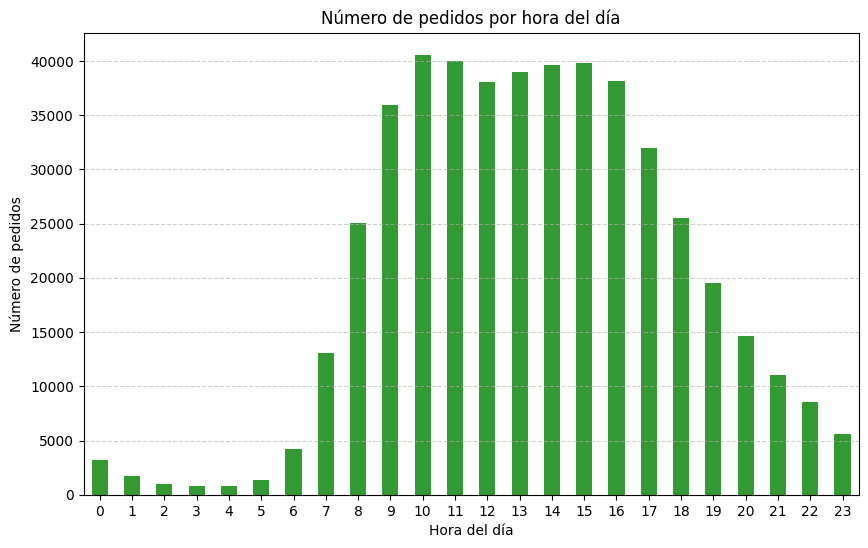

In [ ]:
order_count = orders['order_hour_of_day'].value_counts().sort_index()
order_count.plot(
    kind='bar', alpha=0.8, figsize=[10,6], 
    title='Número de pedidos por hora del día',
    xlabel='Hora del día', ylabel='Número de pedidos', rot=0, color='g')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Muy buen trabajo el desarrollar una gráfica para visualizar los resultados
</div>

Escribe aquí tus conclusiones<br>
*Podemos ver gracias a la gráfica anterior, que las horas donde menos número de pedidos se realizan es entre las 12am y las 6am, de igual forma a partir de las 10pm comienza a disminuir el tráfico de pedidos. Ahora podemos comprender que a partir de las 8am y hasta las 6pm el número de pedidos que se realizan esta entre 25.000 y un poco más de 40.000, siendo la hora mas importante las 10 de la mañana pero mantenindose muy a la par en ell número hasta 4pm.*

### [A3] ¿Qué día de la semana compran víveres las personas?

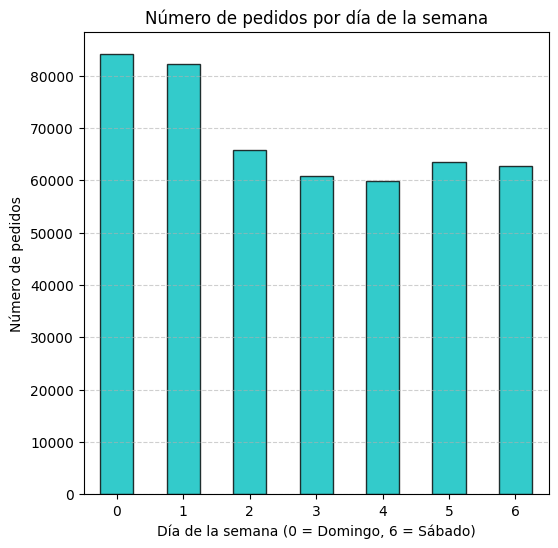

0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64


In [ ]:
order_day = orders['order_dow'].value_counts().sort_index()
order_day.plot(
    kind='bar', alpha=0.8, figsize=[6,6], 
    title='Número de pedidos por día de la semana',
    xlabel='Día de la semana (0 = Domingo, 6 = Sábado)', ylabel='Número de pedidos', rot=0, color='c', edgecolor='black')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
print(order_day)

Escribe aquí tus conclusiones<br>
*Todos lo días de la semana las personas están comprando viveres, sin embargo es importante recalcar que los días preferidos para realizar estas compras son domingos, lunes y martes, siendo el principal el domingo y al contrario los días de menos pedidos son los miércoles y jueves, siendo el jueves el que registra menos pedidos en la semana.*

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

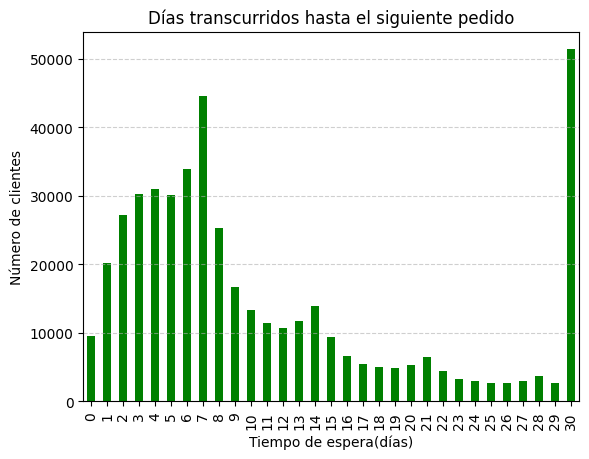

El número minimo de pedidos es 2640 y ocurre a los [26] días
El número máximo de pedidos es 51337 y ocurre a los [30] días


In [ ]:
orders_prior= orders['days_since_prior_order'].value_counts().sort_index()
orders_prior.index= orders_prior.index.astype(int)
orders_prior.plot(
    title='Días transcurridos hasta el siguiente pedido',
    xlabel='Tiempo de espera(días)',
    ylabel='Número de clientes',
    kind='bar',
    color='g',
)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
min_value=orders_prior.min()
min_days=orders_prior[orders_prior== min_value].index.tolist()
max_value=orders_prior.max()
max_days=orders_prior[orders_prior== max_value].index.tolist()

print(f'El número minimo de pedidos es {min_value} y ocurre a los {min_days} días')
print(f'El número máximo de pedidos es {max_value} y ocurre a los {max_days} días')

Escribe aquí tus conclusiones<br>
*El tiempo máximo que esperan las personas hasta hacer otro pedido es de 30 días y el tiempo mínimo es de 26 días, lo que supone una ocurrencia practicamente mensual.*

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

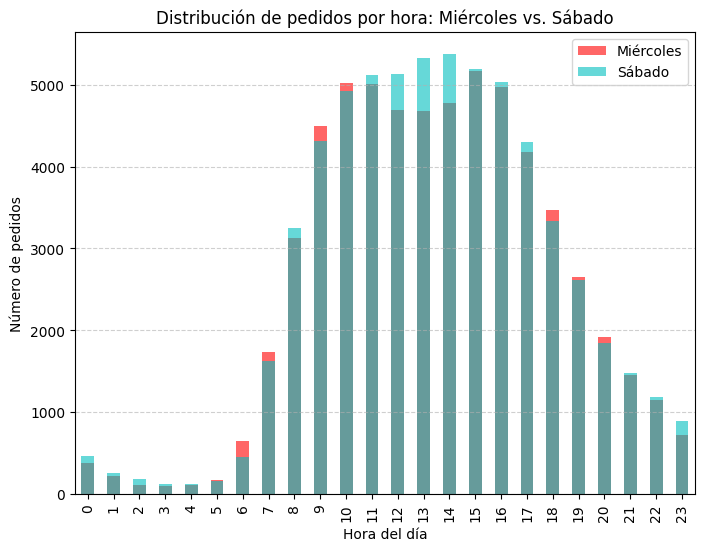

In [ ]:
wednesday_orders = orders[orders['order_dow'] == 3]['order_hour_of_day'].value_counts().sort_index()
saturday_orders = orders[orders['order_dow'] == 6]['order_hour_of_day'].value_counts().sort_index()

wednesday_orders.plot(kind='bar', alpha=0.6, color='r', label='Miércoles', figsize=[8,6],
                     xlabel='Hora del día', ylabel='Número de pedidos',
                     title='Distribución de pedidos por hora: Miércoles vs. Sábado')
saturday_orders.plot(kind='bar', alpha=0.6, color='c', label='Sábado')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.show()

Escribe aquí tus conclusiones<br>
*Los días sábados entre las 11:00 am y las 2:00 pm, también entre las 12:00 am y las 3:00 am y a las 5:00 pm y las 11:00 pm se realizan más pedidos que los miércoles, mientras que entre las 6:00 am y las 7:00 am, luego entre las 9:00 pm y 10:00 am y entre las 6:00 pm y las 8:00 pm se realizan más pedidos los miercoles.*

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

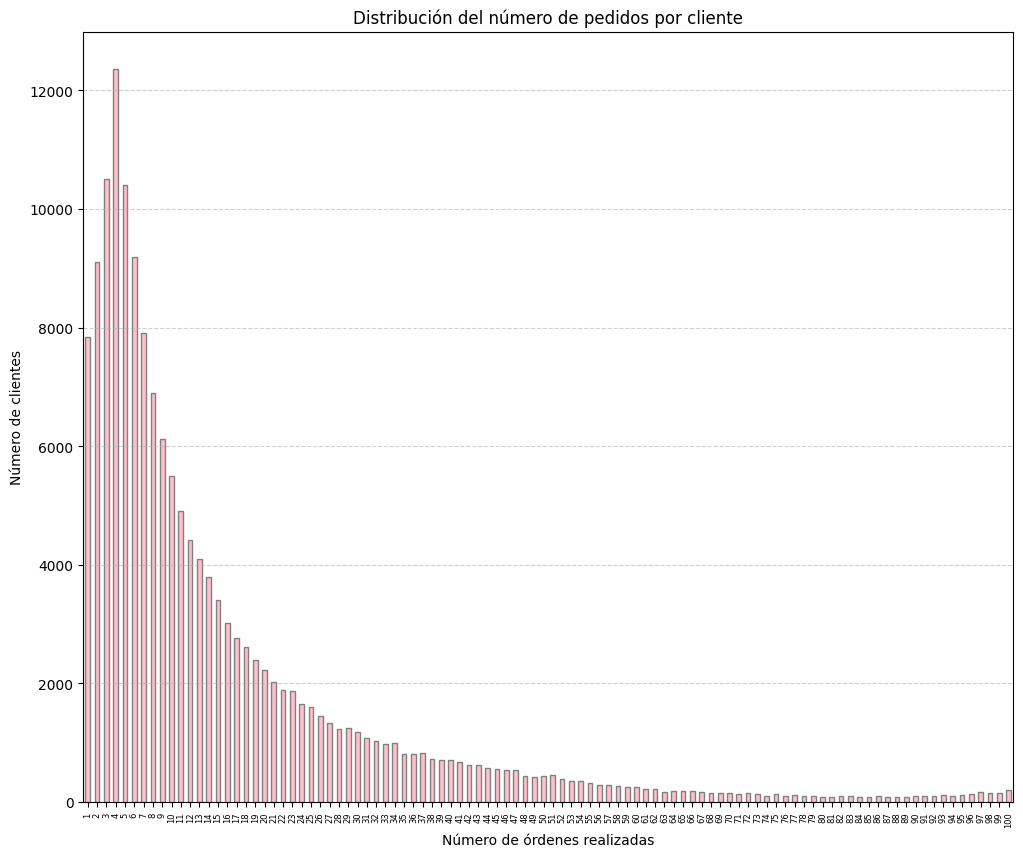

In [ ]:
order_counts = orders.groupby('user_id')['order_number'].max().value_counts().sort_index()

ax = order_counts.plot(
    kind='bar', figsize=[12,10], color='pink', edgecolor='grey',
    title='Distribución del número de pedidos por cliente',
    xlabel='Número de órdenes realizadas', ylabel='Número de clientes', rot=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
ax.set_xticklabels(order_counts.index, rotation=90, fontsize=6)

plt.show()

Escribe aquí tus conclusiones<br>
*La distribución del número de pedidos por cliente indica que la mayoría de los usuarios realizan pocos pedidos, lo que sugiere una alta proporción de compradores ocasionales, siendo 4 el número de pedidos que más realizan los clientes. Sin embargo, existe un grupo más reducido de clientes recurrentes que representan una parte significativa de las compras. Para mejorar la retención y aumentar la frecuencia de pedidos, podría ser útil implementar estrategias como descuentos para compradores recurrentes o programas de fidelización y de igual manera seguir atrayendo nuevos clientes.*

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

    product_id              product_name  num_orders
0        24852                    BANANA       66050
1        13176    BAG OF ORGANIC BANANAS       53297
2        21137      ORGANIC STRAWBERRIES       37039
3        21903      ORGANIC BABY SPINACH       33971
4        47209      ORGANIC HASS AVOCADO       29773
5        47766           ORGANIC AVOCADO       24689
6        47626               LARGE LEMON       21495
7        16797              STRAWBERRIES       20018
8        26209                     LIMES       19690
9        27845        ORGANIC WHOLE MILK       19600
10       27966       ORGANIC RASPBERRIES       19197
11       22935      ORGANIC YELLOW ONION       15898
12       24964            ORGANIC GARLIC       15292
13       45007          ORGANIC ZUCCHINI       14584
14       39275       ORGANIC BLUEBERRIES       13879
15       49683            CUCUMBER KIRBY       13675
16       28204        ORGANIC FUJI APPLE       12544
17        5876             ORGANIC LEMON      

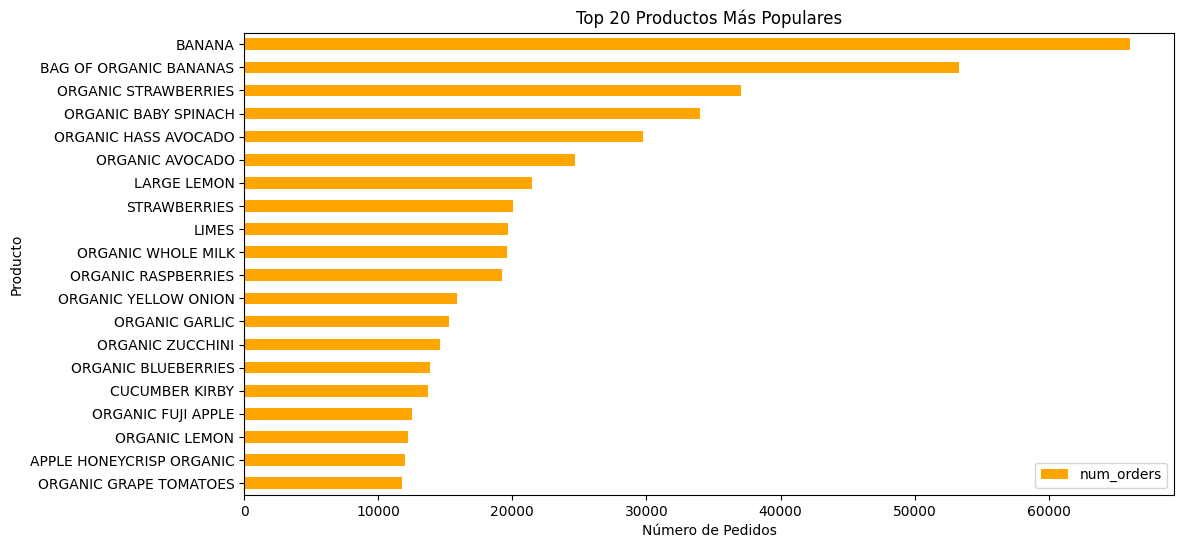

In [ ]:
popular_products = order_products['product_id'].value_counts().reset_index()
popular_products.columns = ['product_id', 'num_orders']

popular_products = popular_products.merge(products, on='product_id')

top_20_products = popular_products.head(20)

print(top_20_products[['product_id', 'product_name', 'num_orders']])
print()
top_20_products = top_20_products.sort_values("num_orders", ascending=False)
top_20_products.plot(x="product_name", y="num_orders", kind="barh", figsize=(12, 6), color="orange")
plt.xlabel("Número de Pedidos")
plt.ylabel("Producto")
plt.title("Top 20 Productos Más Populares")

plt.gca().invert_yaxis()
plt.show()

Escribe aquí tus conclusiones<br>
*En la gráfica anterior se logra visualizar los 20 productos más populares entre los compradores, destacan los bananos y por supuesto es claro que la tendencia a adquirir productos organicos representa una importancia muy clara asi que la apuesta por los productos orgánicos puede ser un plus importante que se debe seguir teniendo en cuenta.*

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Gran trabajo con el desarrollo de estos ejercicios, donde complementas con gráficas para mostrar mejor los resultados


# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

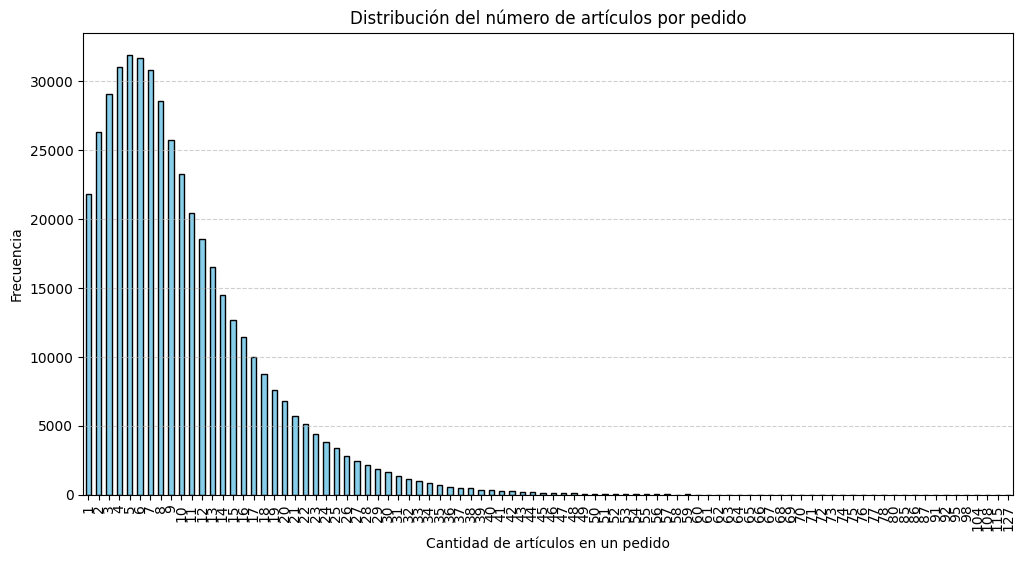

El número mínimo de artículos en un pedido es 1.
El número máximo de artículos en un pedido es 127.
El promedio de artículos por pedido es 10.


In [ ]:
buys = order_products.groupby('order_id')['product_id'].count()

buys.value_counts().sort_index().plot(kind='bar', figsize=(12, 6), color='skyblue', edgecolor='black')

plt.xlabel("Cantidad de artículos en un pedido")
plt.ylabel("Frecuencia")
plt.title("Distribución del número de artículos por pedido")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

min_items = buys.min()
max_items = buys.max()
avg_items = buys.mean()

print(f"El número mínimo de artículos en un pedido es {min_items}.")
print(f"El número máximo de artículos en un pedido es {max_items}.")
print(f"El promedio de artículos por pedido es {avg_items:.0f}.")

Escribe aquí tus conclusiones<br>
*Las personas en promedio compran 10 artículos en un pedido y esto representa mas de 30.000 veces, podemos ver que la distribución se concentra en su mayoria en digamos 15 productos, esto es similar a lo analizado anteriormente en el "top 20" de productos, acá vemos que mas de 20.000 veces los clientes solo compran un producto y de igual forma existen clientes que compran muchos productos (hasta 127) pero con una frecuencia muy baja. Así que se podria tener en cuenta dado que el promedio esta en 10 productos, ofrecer algún incentivo de compra a partir de este número de productos por pedido.*

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [ ]:
reordered_products = order_products[order_products['reordered'] == 1]

top_reordered = reordered_products['product_id'].value_counts().head(20)
#print(top_reordered)

top_products = products[products['product_id'].isin(top_reordered.index)]
top_products = top_products[['product_id', 'product_name']]
top_products = top_products.merge(top_reordered.to_frame(), left_on='product_id', how='inner', right_index=True)
top_products.rename(columns={"product_id_y": "repetitions"}, inplace=True)
top_products = top_products.drop(columns=['product_id_x'])
top_products = top_products.sort_values("repetitions", ascending=False)

print(top_products)

       product_id              product_name  repetitions
24851       24852                    BANANA        55763
13175       13176    BAG OF ORGANIC BANANAS        44450
21136       21137      ORGANIC STRAWBERRIES        28639
21902       21903      ORGANIC BABY SPINACH        26233
47208       47209      ORGANIC HASS AVOCADO        23629
47765       47766           ORGANIC AVOCADO        18743
27844       27845        ORGANIC WHOLE MILK        16251
47625       47626               LARGE LEMON        15044
27965       27966       ORGANIC RASPBERRIES        14748
16796       16797              STRAWBERRIES        13945
26208       26209                     LIMES        13327
22934       22935      ORGANIC YELLOW ONION        11145
24963       24964            ORGANIC GARLIC        10411
45006       45007          ORGANIC ZUCCHINI        10076
49682       49683            CUCUMBER KIRBY         9538
28203       28204        ORGANIC FUJI APPLE         8989
8276         8277  APPLE HONEYC

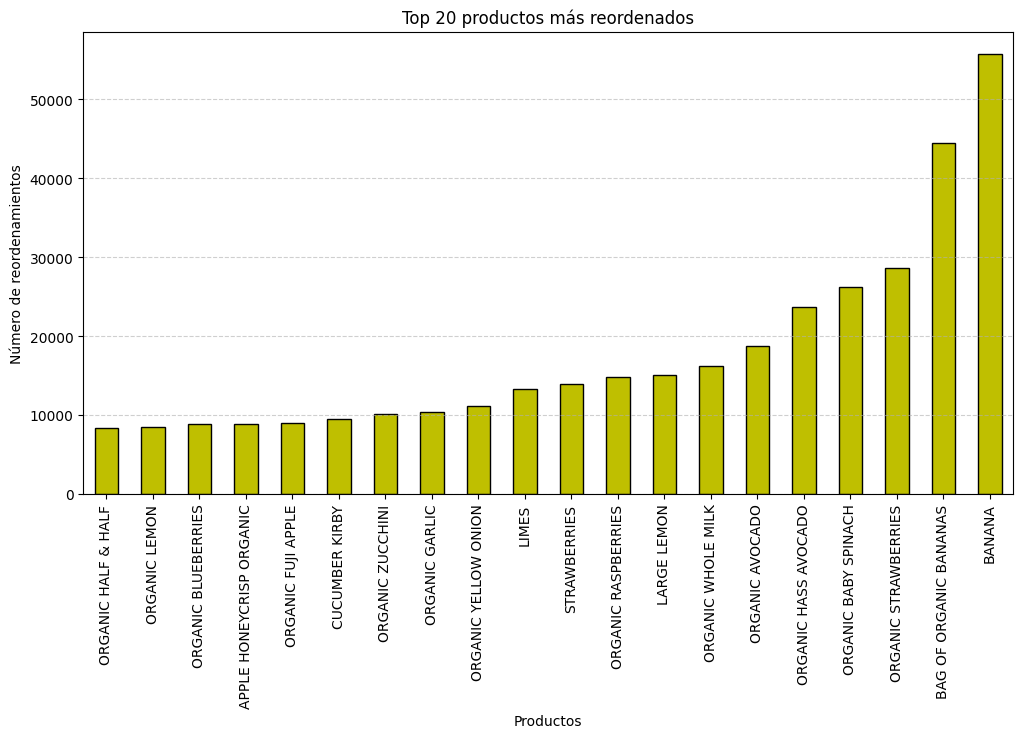

In [ ]:
top_products.set_index("product_name")["repetitions"].plot(kind="bar", figsize=(12, 6), 
                        color="y", edgecolor="black", title="Top 20 productos más reordenados",
                        ylabel='Número de reordenamientos', xlabel= 'Productos')
plt.gca().invert_xaxis()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Escribe aquí tus conclusiones<br>
*Con esta información que se muestra arriba podemos ver los 20 productos que más se reordenan y esto se encuentra en concordancia con lo anteriormente mencionado, los bananos como la "joya de la corona", (algo que no debe descuidarse) y los productos orgánicos que definitivamente prometen en gran medida.*

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [ ]:
total_orders = order_products["product_id"].value_counts()

In [ ]:
reordered_counts = order_products[order_products["reordered"] == 1]["product_id"].value_counts()

In [ ]:
reorder_prop = (reordered_counts / total_orders).to_frame().reset_index()
reorder_prop.columns = ["product_id", "reorder_prop"]
result = products[["product_id", "product_name"]].merge(reorder_prop, on="product_id")
print(result.sort_values(by="reorder_prop", ascending=False).sample(20))

       product_id                                       product_name  \
16507       18036                                PREMIUM HORSERADISH   
40300       43977  EVERYDAY HEAVY DUTY SPOONS DISHWASHER SAFE PLA...   
13221       14465                    GRAIN SWEETENED CHOCOLATE CHIPS   
29506       32173  DRY TOUCH SUNSCREEN SPF 70 POSTED 5/21/2013 UL...   
30244       32980        MINI I.D.'S FRENCH VANILLA CREAMER- SINGLES   
5221         5712                        CASHEW ALMOND BREAKFAST BAR   
11332       12434                                 FOLIC ACID 800 MCG   
135           150                                          BRUT ROSÉ   
42251       46097  INSTANT BREAKFAST ESSENTIALS RICH MILK CHOCOLA...   
25205       27461       POCKY CHOCOLATE CREAM COVERED BISCUIT STICKS   
34261       37369                        RANCH LIL' CRUNCHIES SAVORY   
5246         5738              GLUTEN FREE MULTI PURPOSE FLOUR BLEND   
12461       13645                           ORGANIC SPAGHETTI NO

Escribe aquí tus conclusiones<br>
*En el anterior análisis calculamos la proporción y podemos ver el porcentaje en el que cada producto que ya se ha ordenado anteriormente se vuelve a ornenar nuevamente, por ejemplo "ESSENCE ANTIPERSPIRANT STICK" tiene proporción del 100% de ser reordenado mientras que "GLUTEN FREE MULTI PURPOSE FLOUR BLEND" solo se ha reordenado en un 25%.*

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [ ]:
data = order_products.merge(orders[["order_id", "user_id"]], on="order_id")
total_products_per_user = data["user_id"].value_counts()

reordered_products_per_user = data[data["reordered"] == 1]["user_id"].value_counts()
reorder_ratio_per_user = (reordered_products_per_user / total_products_per_user).fillna(0)

reorder_ratio_df = reorder_ratio_per_user.to_frame().reset_index()
reorder_ratio_df.columns = ["user_id", "reorder_ratio"]

print(reorder_ratio_df.sample(20))

        user_id  reorder_ratio
128567   177315       0.000000
32241     44519       1.000000
58866     81244       0.380952
67991     93777       0.384615
143816   198166       0.666667
72882    100535       0.409091
38808     53600       0.777778
112206   154821       0.470588
71254     98305       0.555556
5514       7538       0.333333
39718     54859       0.783784
104315   143993       0.377778
32710     45170       0.307692
67188     92667       0.300000
48833     67461       0.465517
106870   147530       0.125000
80071    110378       0.600000
135767   187187       0.187500
1151       1577       0.615385
68630     94672       1.000000


Escribe aquí tus conclusiones<br>
*Acá estamos calculando la proporción de productos que ya habia pedido cada cliente, así logramos saber que habia comprado y de esto que proporción volvio a comprar.*

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

    product_id                 product_name
0          196                         SODA
1         5785  ORGANIC REDUCED FAT 2% MILK
2        12341                HASS AVOCADOS
3        13176       BAG OF ORGANIC BANANAS
4        16797                 STRAWBERRIES
5        19660                 SPRING WATER
6        21137         ORGANIC STRAWBERRIES
7        21903         ORGANIC BABY SPINACH
8        22935         ORGANIC YELLOW ONION
9        24852                       BANANA
10       26209                        LIMES
11       27086                  HALF & HALF
12       27845           ORGANIC WHOLE MILK
13       27966          ORGANIC RASPBERRIES
14       38689     ORGANIC REDUCED FAT MILK
15       44632   SPARKLING WATER GRAPEFRUIT
16       47209         ORGANIC HASS AVOCADO
17       47626                  LARGE LEMON
18       47766              ORGANIC AVOCADO
19       49235          ORGANIC HALF & HALF


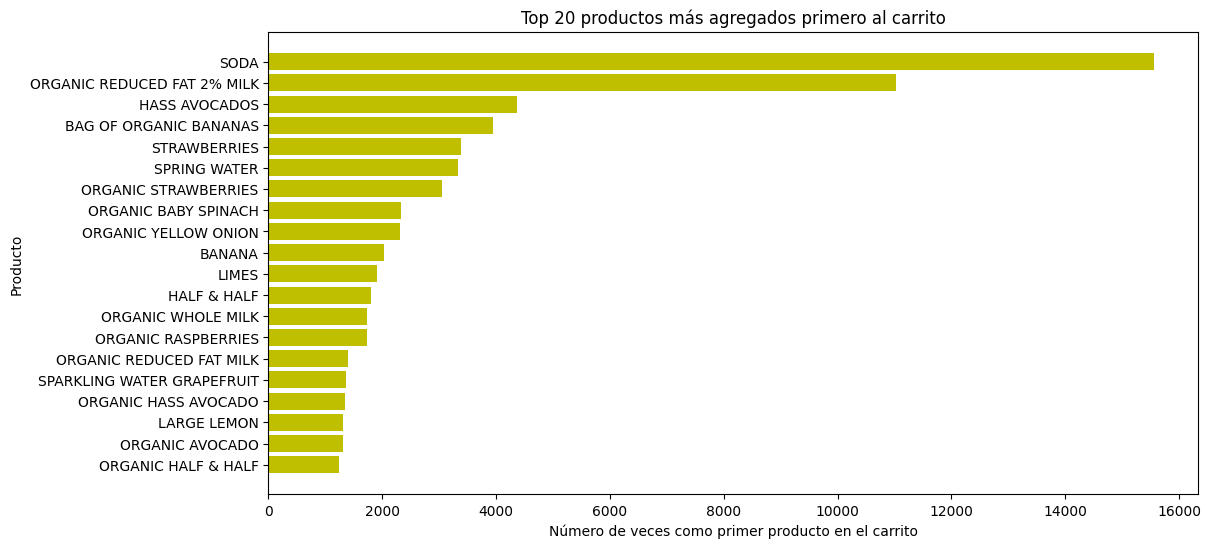

In [ ]:
first_added_products = order_products[order_products["add_to_cart_order"] == 1]
top_first_added = first_added_products["product_id"].value_counts().head(20)

top_products = products[products["product_id"].isin(top_first_added.index)]
top_products = top_products[["product_id", "product_name"]].reset_index(drop=True)
print(top_products)

top_products["num_times_first_added"] = top_first_added.values
plt.figure(figsize=(12, 6))
plt.barh(top_products["product_name"], top_products["num_times_first_added"], color="y")
plt.xlabel("Número de veces como primer producto en el carrito")
plt.ylabel("Producto")
plt.title("Top 20 productos más agregados primero al carrito")
plt.gca().invert_yaxis()
plt.show()


Escribe aquí tus conclusiones<br>
*En la gráfica anterior, ahi la SODA y la leche es lo más importante,  podemos hacernos a una idea de que productos son los que primero se agregan al carrito, esto se puede deber a preferencias de los clientes, a necesidades, a buena calidad de los productos, a mejores precios en cuanto a otras posibilidades, entonces se pueden tomar decisiones con base en esto y planear estrategias tal vez de enganche para aumentar las ventas y sobretodo la ocurrencia de ellas.*
*

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Gran trabajo con el desarrollo de estos ejercicios. Calculas de manera perfecta las proporciones

### Conclusion general del proyecto:

**Éste proyecto ha sido realmente interesante, logramos trabajar con datos de pedidos, productos, clientes y mercancias que nos ha dejado muchismas conclusiones importantes, a lo largo del desarrollo encontramos distintos desafios en cuanto al manejo de los datos, como datos duplicados y nulos que fuimos abordando de la mejor manera pues perder datos es algo que nos comprometeria seriamente los resultados del análisis. Ahora bien, yo considero que hay grandes posibilidades de mejora debido al análisis realizado, pues vimos el comportamiento de los clientes dependiendo los dias, las horas del dia y los productos, entonces se pueden adoptar estrategias que ayuden a fidelizar y afianzar a los clientes recurrentes que representan una parte imprescindible de las compras diarias y que seguramente correran la voz si son bien tratados, a ellos especial atención, a los nuevos estrategias de enganche, por lo demás en el transcurso del proyecto siento que se dieron conclusiones especificas y claras.**